# App Data For Advertising
Zoom Ads is an advertising agency that wants to perform an analysis on the data of the google play store.   
Zoom wants to understand trends of applications available on the google play store so that zoom can decide to focus on promoting advertisements on particular applications which are trending in the market.  

## Data Description

* App: Application Name
* Category: Category the app belongs to (`Others` category contain apps from various different categories excluded from the dataset)
* Rating: Overall user rating of the app
* Reviews: Number of user reviews for the app
* Size: Size of the app in kilobytes
* Installs: Number of user downloads/installs for the app
* Paid/Free: Whether an app is paid or free
* Price: price of an app in dollars
* Content Rating: Age group the app is targeted at
* Ad Supported: whether an app supports an Ad or not (Yes/No)
* In App Purchases: App containing in app purchase feature or not (Yes/No)
* Editors Choice: Whether rated as Editor Choice (Yes/No)

## Dependencies

In [87]:
# for colab env
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [88]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.float_format", lambda x: "%.2f" % x) #to display values upto 2 decimal places

## Importing & Previewing the data

In [89]:
df= pd.read_csv('data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.90,160604.00,270.00,10000000.00,Free,0.00,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.40,NaN,46.00,100000.00,Free,0.00,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.00,29.00,100000.00,Free,0.00,Everyone,Yes,No,No
3,Ay,Others,NaN,11.00,36.00,5000.00,Free,0.00,Teen,Yes,No,No
4,EA Plus,Others,2.50,12.00,12.00,1000.00,Free,0.00,Everyone,No,No,No


## Data Review & Cleanup
### Summaries

In [90]:
[rowCount, columnCount] = df.shape
print(f'{rowCount} rows')
print(f'{columnCount} columns')

4153 rows
12 columns


In [91]:
# view data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


In [92]:
# 
# see some descriptive statistics about each column
# 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,4153,4153,War Dragons,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,4153,15,Others,1288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3976.00,NaN,NaN,NaN,4.19,0.52,1.00,4.00,4.30,4.50,5.00
Reviews,4029.00,NaN,NaN,NaN,66964.21,107418.85,1.00,224.00,7461.00,78219.00,312204.00
Size,4153.00,NaN,NaN,NaN,82.25,92.26,0.01,22.00,42.00,84.00,270.00
Installs,4153.00,NaN,NaN,NaN,3232705.64,5421343.28,1.00,10000.00,500000.00,5000000.00,19970000.00
Paid/Free,4153,2,Free,3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4153.00,NaN,NaN,NaN,0.57,8.93,0.00,0.00,0.00,0.00,399.99
Content Rating,4153,4,Everyone,3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad Supported,4153,2,Yes,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Statistical Observations
- **The Average Rating** is 4.19, and out-of-five that seems like a high average.
- **The Count of Reviews** Seems to have a right skew: the 50% percentile is ~7.5K, 75% percentile is 78K, and the max is 312K.
- **Most apps are free**: 3800 of 4100 are free
- **31% of Apps are "Other" category**: 1288 of the 4153 apps
- **~Half of apps support ads**
- **~Half of apps have in-app purchases**

### Review & Handle Missing Data

In [93]:
df.isnull().sum()

App                   0
Category              0
Rating              177
Reviews             124
Size                  0
Installs              0
Paid/Free             0
Price                 0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
dtype: int64

The `Rating` Column has 177 missing values.  
The `mean` and the `50% quartile` are pretty close: `4.19` and `4.3` respectively.  
Here, the mean will populate the missing values of the rating column.  

In [94]:
df['Rating'] = df['Rating'].fillna(value= df['Rating'].mean())

The `Reviews` column has 124 missing values.  
The `mean` and the `50% quartile` are not close: `~66.9K` and `~7.8K`.  
To populate these null values, the median would be better than the mean due to the data's skew.

In [95]:
df['Reviews'] = df['Reviews'].fillna(value= df['Reviews'].median())

In [96]:
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Paid/Free           0
Price               0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

## Analysis
### Univariate Analysis

#### Rating

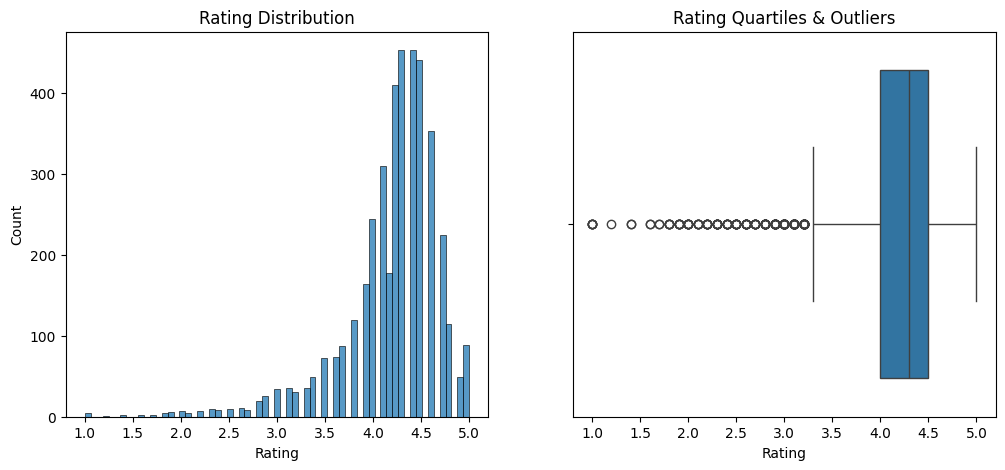

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.histplot(data=df, x='Rating', ax=axes[0])
axes[0].set_title('Rating Distribution')
sns.boxplot(data=df, x='Rating', ax=axes[1])
axes[1].set_title('Rating Quartiles & Outliers')
plt.show()

- Ratings data is skewed left
- Many < Q1 outliers

#### Reviews

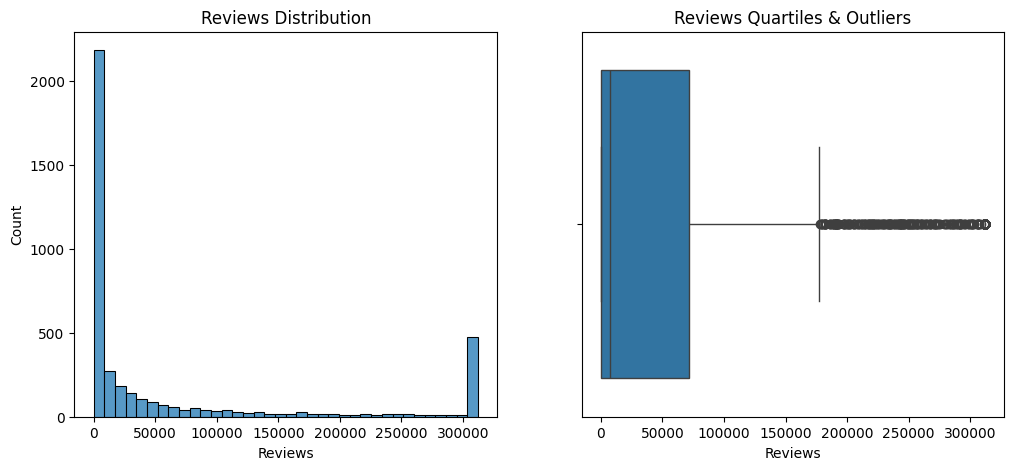

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.histplot(data=df, x='Reviews', ax=axes[0])
axes[0].set_title('Reviews Distribution')
sns.boxplot(data=df, x='Reviews', ax=axes[1])
axes[1].set_title('Reviews Quartiles & Outliers')
plt.show()

- Review data is skewed right
- Outliers are > Q4

#### Size

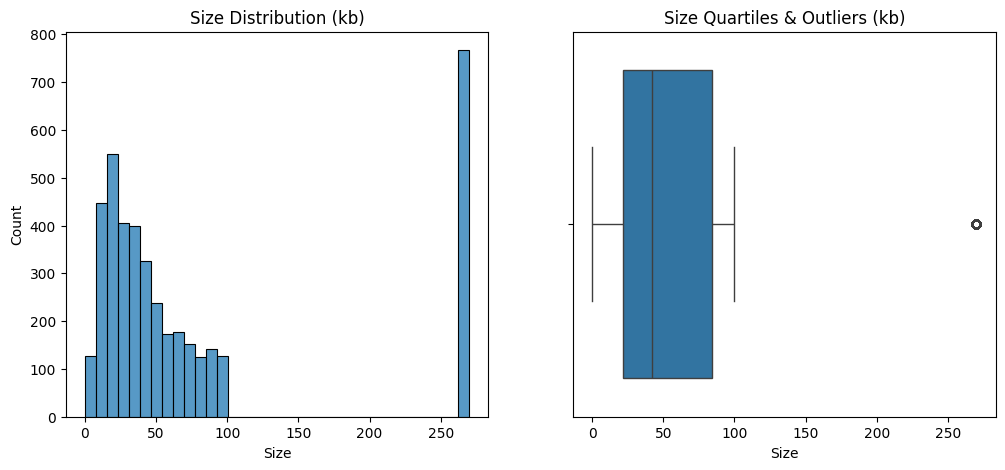

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.histplot(data=df, x='Size', ax=axes[0])
axes[0].set_title('Size Distribution (kb)')
sns.boxplot(data=df, x='Size', ax=axes[1])
axes[1].set_title('Size Quartiles & Outliers (kb)')
plt.show()

- Most apps are < 100 kb in size

#### Installs

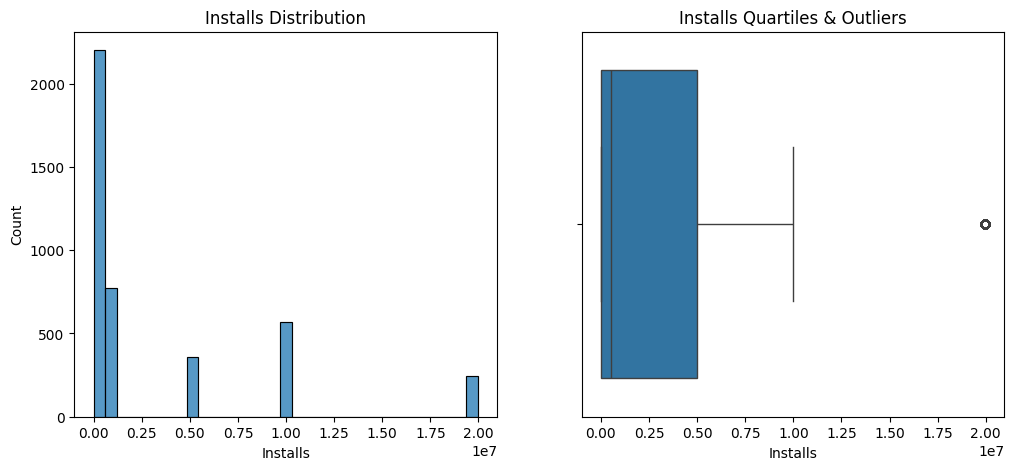

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.histplot(data=df, x='Installs', ax=axes[0])
axes[0].set_title('Installs Distribution')
sns.boxplot(data=df, x='Installs', ax=axes[1])
axes[1].set_title('Installs Quartiles & Outliers')
plt.show()

#### Price

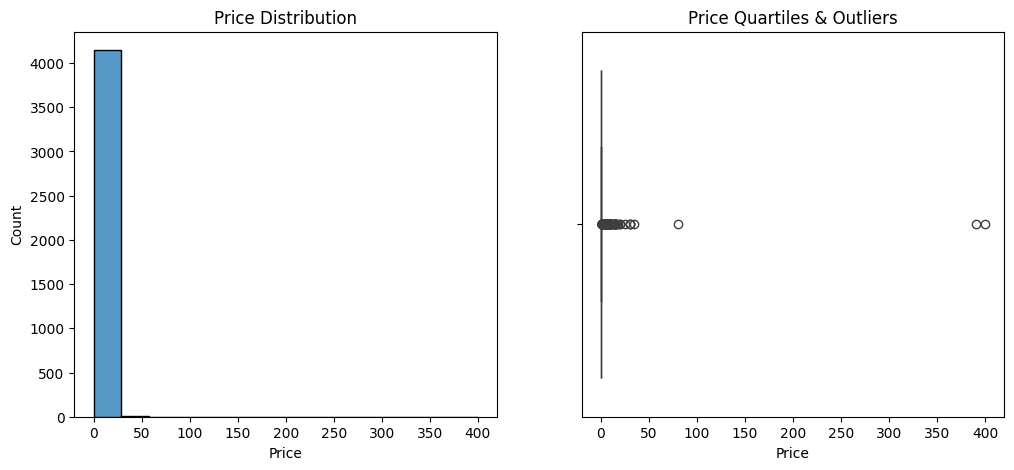

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
sns.histplot(data=df, x='Price', ax=axes[0])
axes[0].set_title('Price Distribution')
sns.boxplot(data=df, x='Price', ax=axes[1])
axes[1].set_title('Price Quartiles & Outliers')
plt.show()

### Categorical Analysis

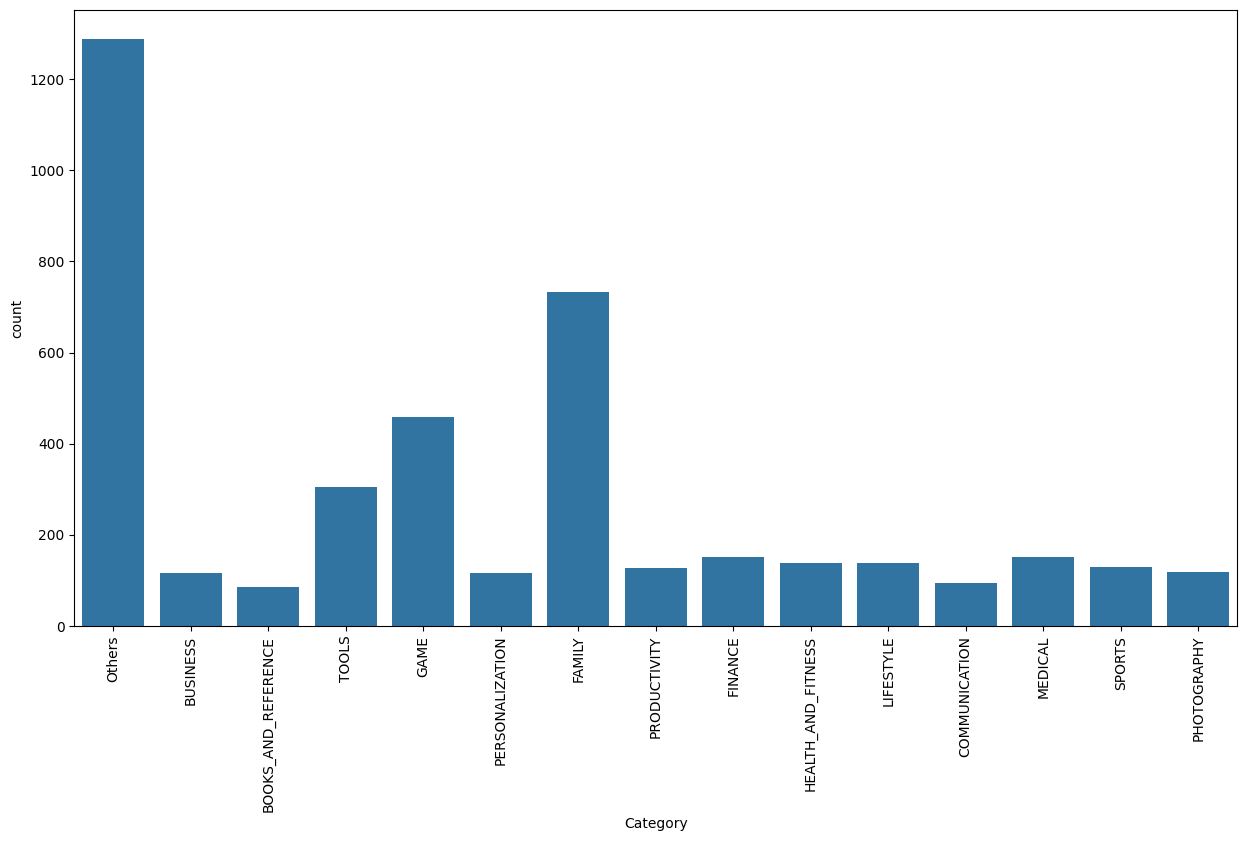

In [102]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90);

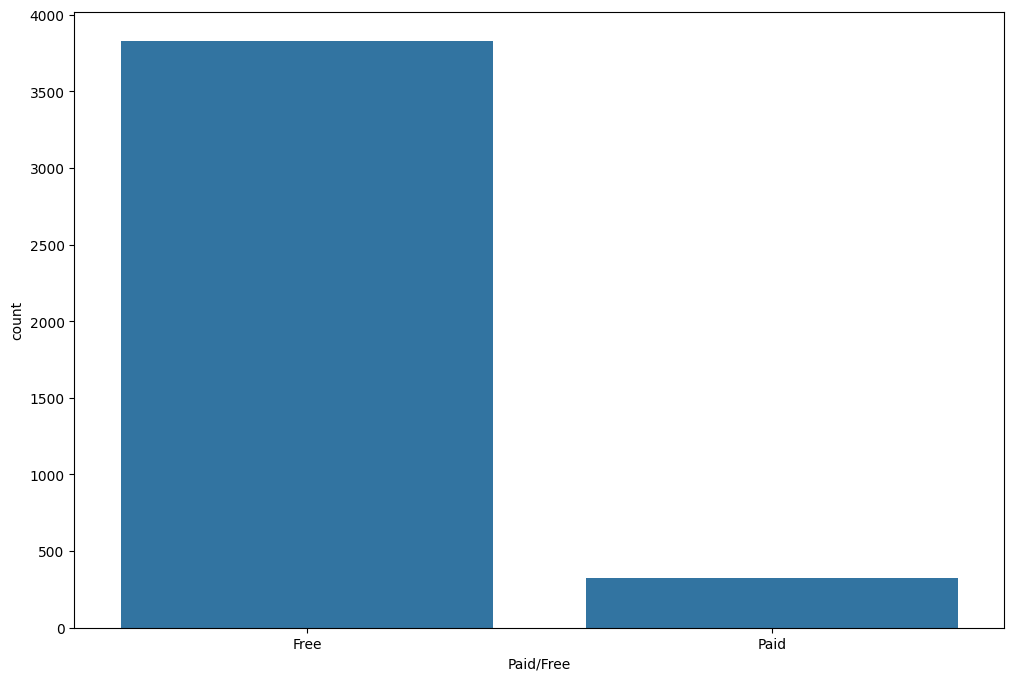

In [103]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Paid/Free');

- *Around 91% of the apps are free to use in play store*

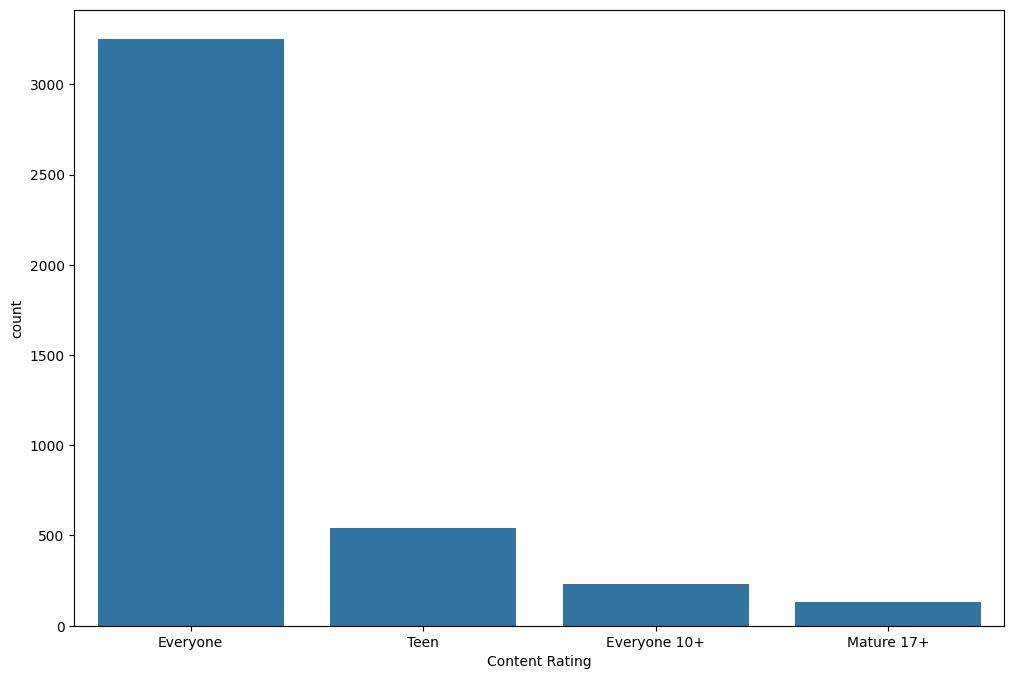

In [104]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Content Rating');

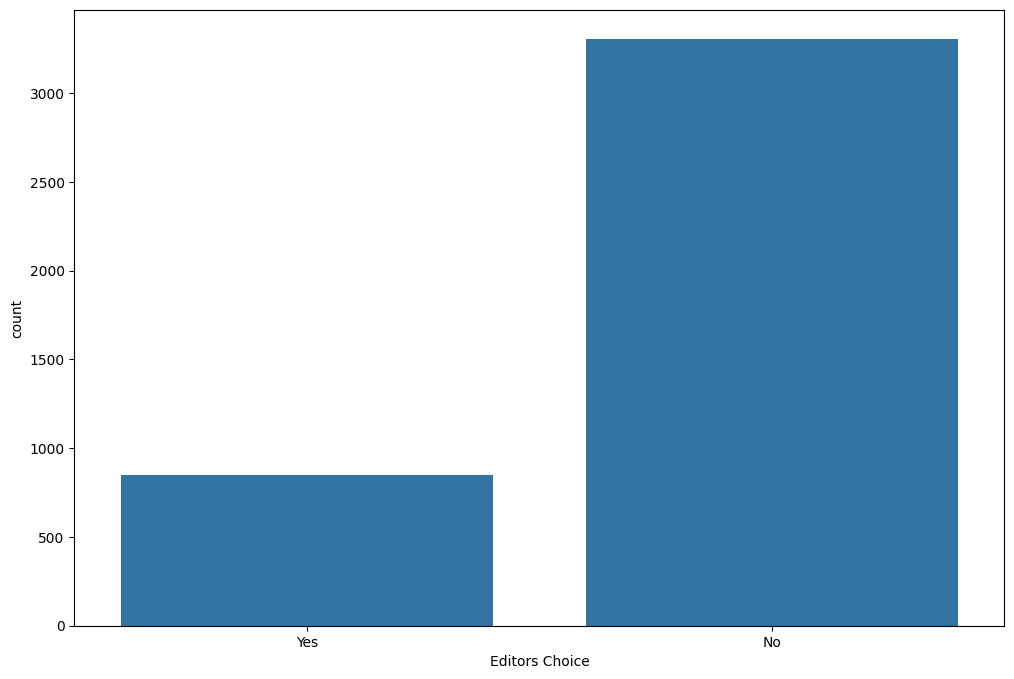

In [105]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Editors Choice');

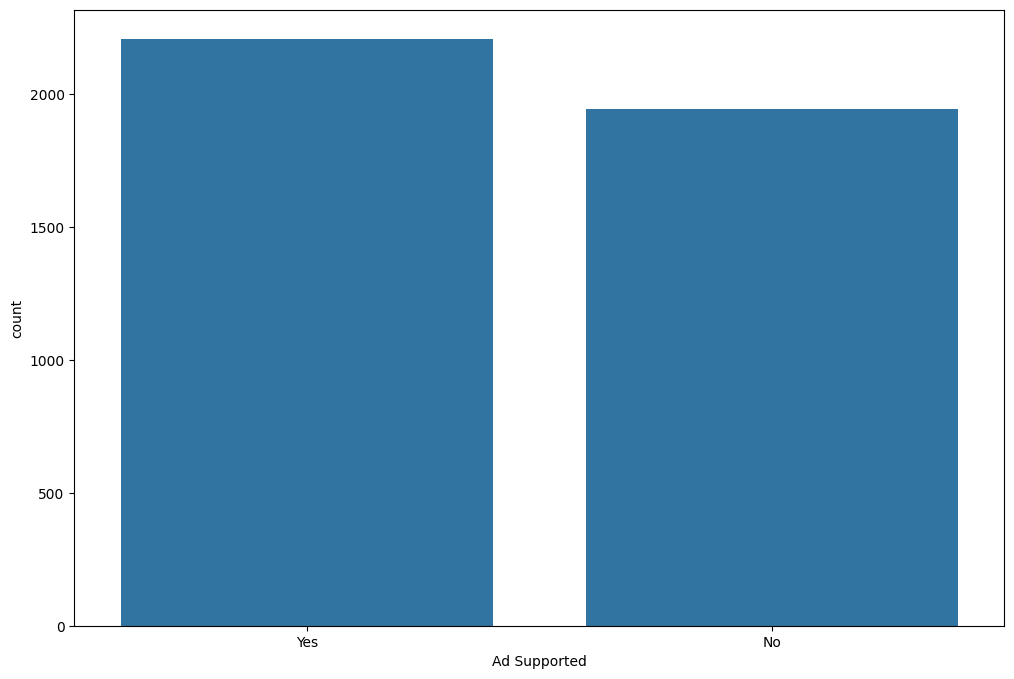

In [106]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Ad Supported');

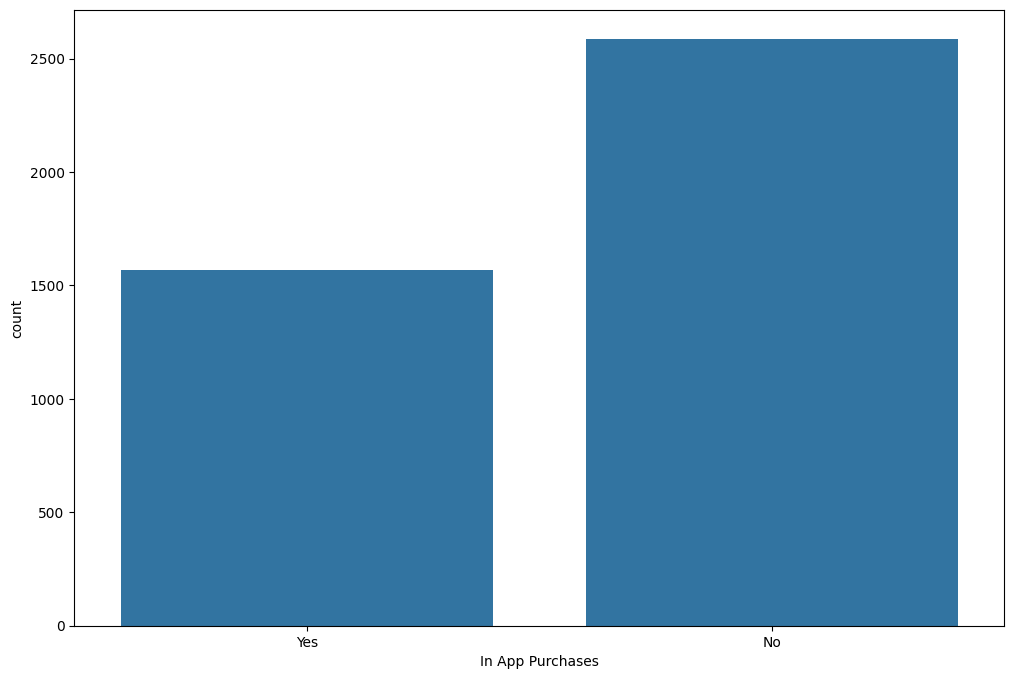

In [107]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='In App Purchases');

- ~2500 apps do not have in-app purchases

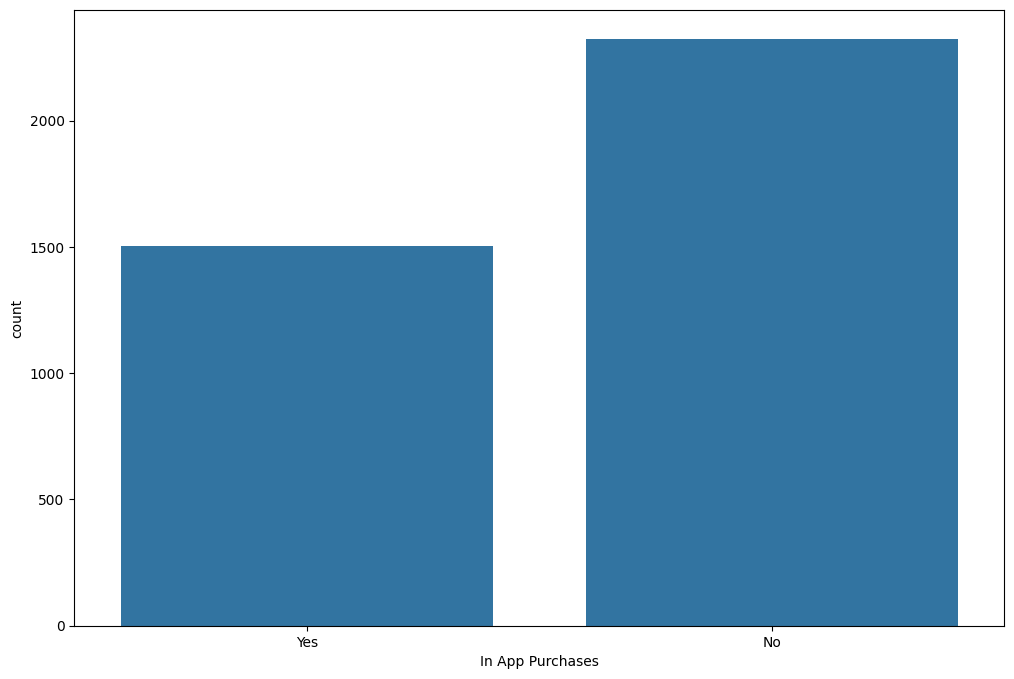

In [108]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['Paid/Free']=='Free'], x='In App Purchases');

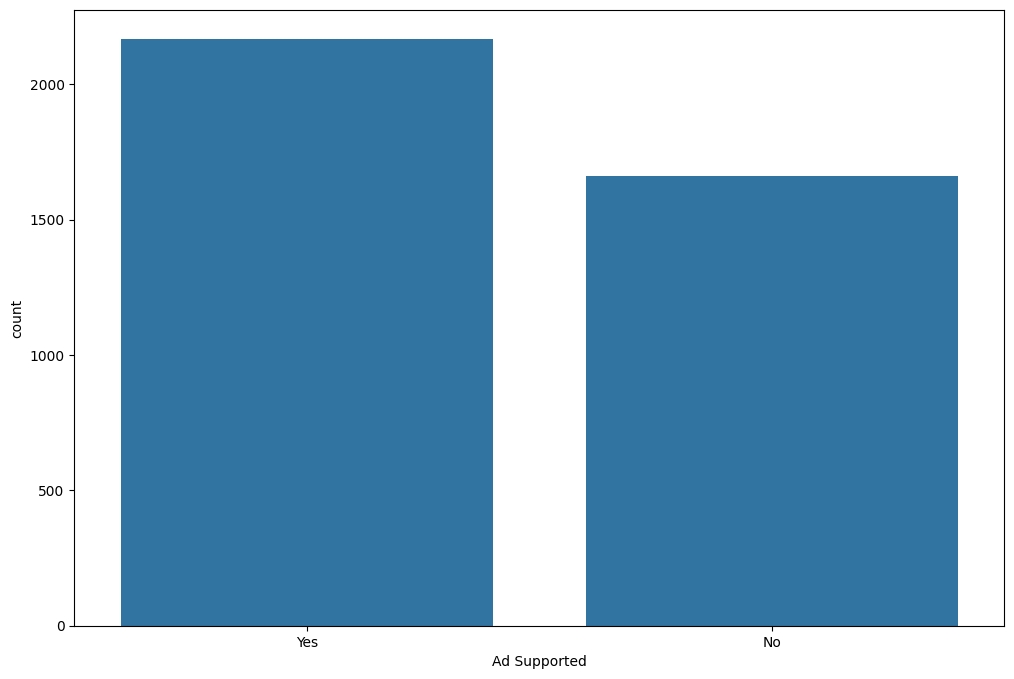

In [109]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['Paid/Free']=='Free'], x='Ad Supported');

### Bivariate Analysis

#### Categories-to-Ratings

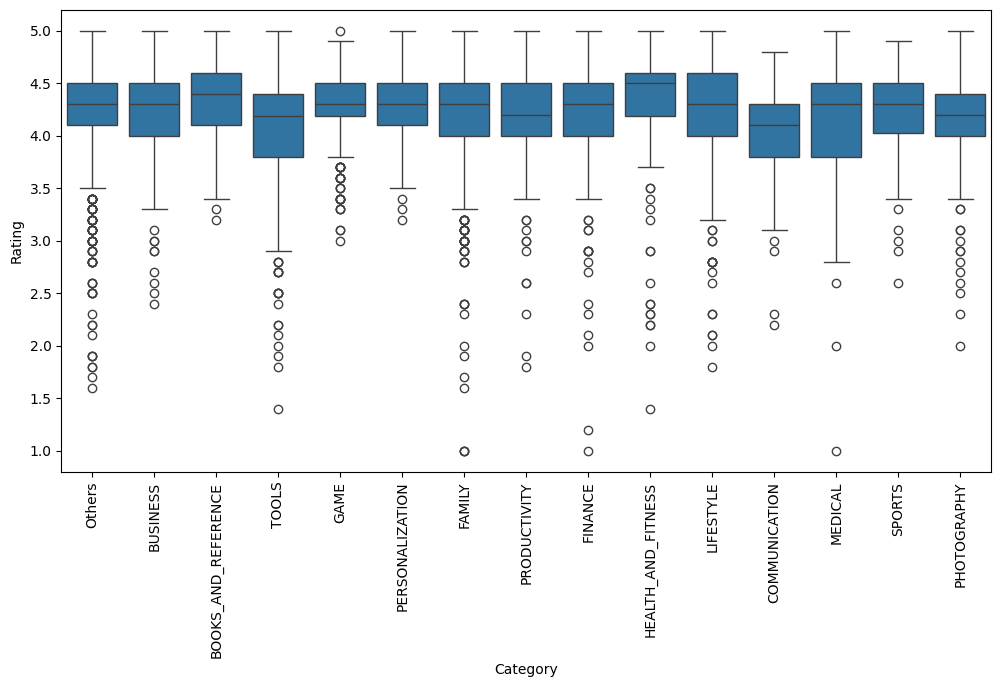

In [110]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90);

#### Reviews-per-category

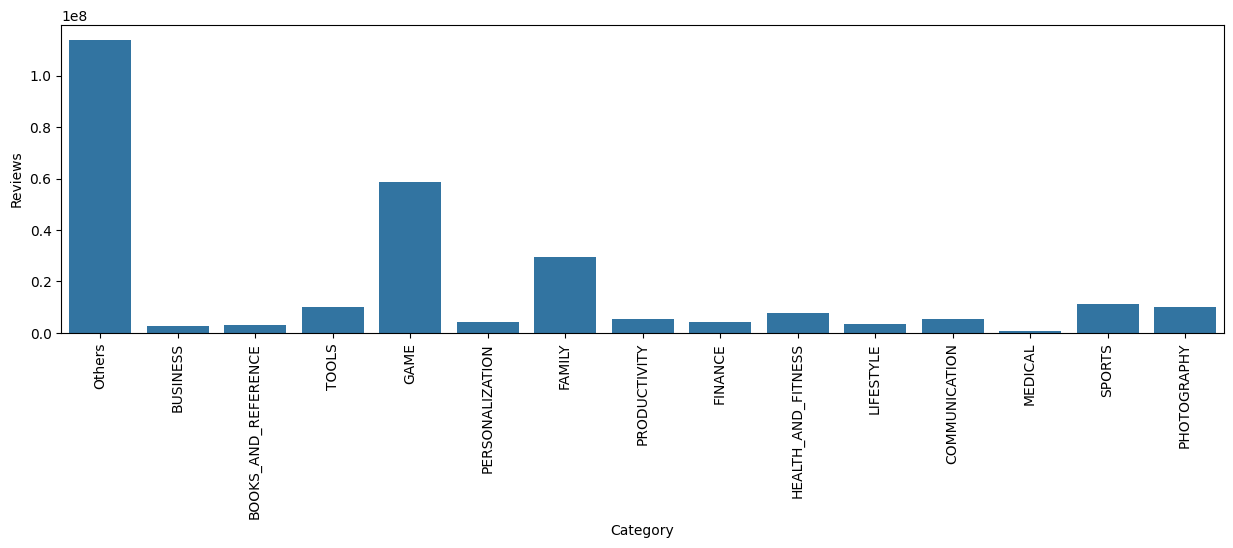

In [111]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='Category', y='Reviews', errorbar=None, estimator='sum')
plt.xticks(rotation=90)
plt.show()


#### Category-To-Installs

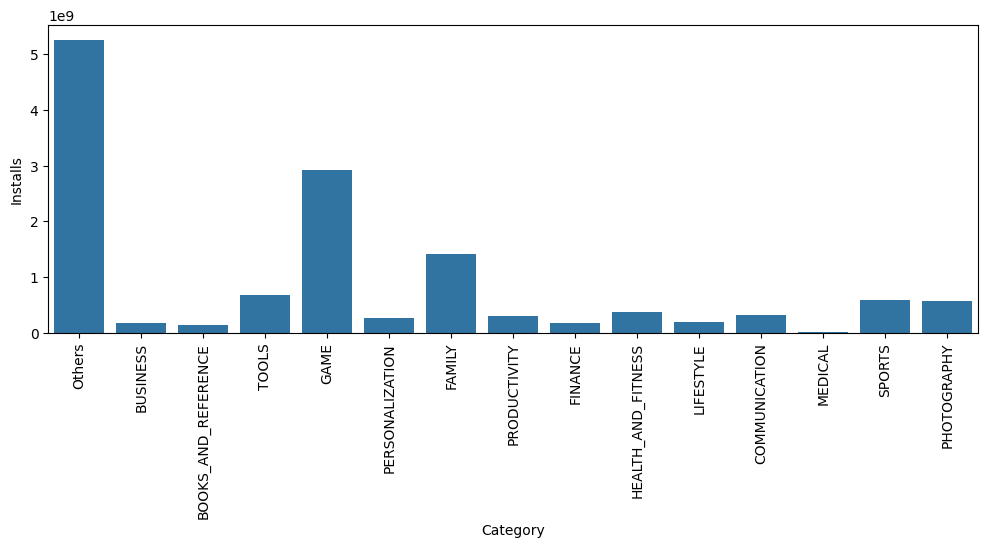

In [112]:
plt.figure(figsize=(12, 4))
sns.barplot(data=df, x='Category', y='Installs', errorbar=None, estimator='sum')
plt.xticks(rotation=90)
plt.show()

#### Category-to-price

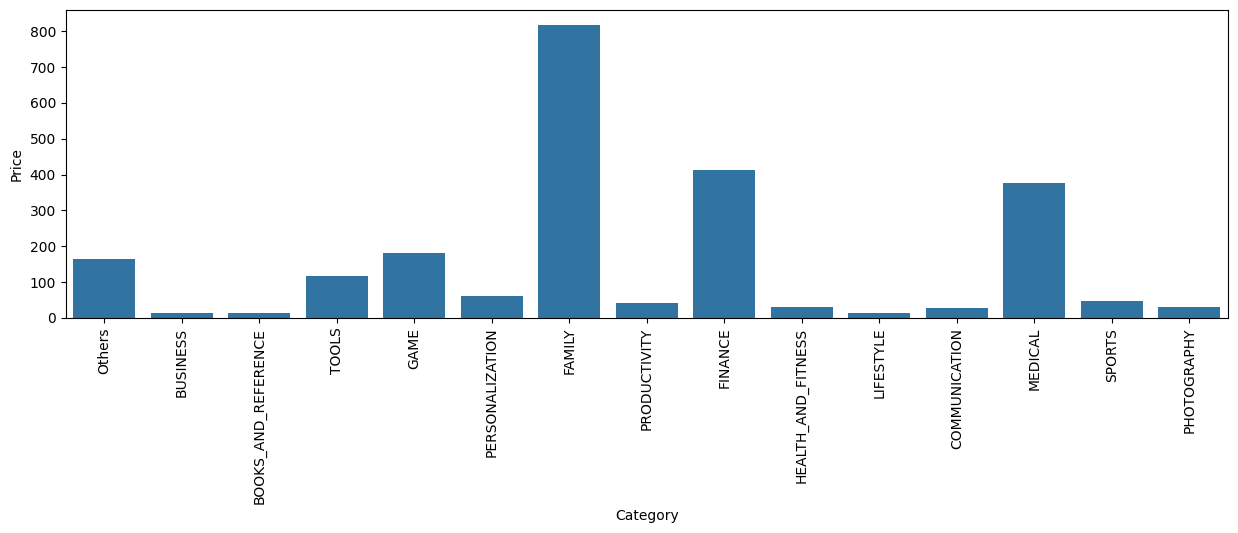

In [113]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='Category', y='Price', errorbar=None, estimator='sum')
plt.xticks(rotation=90)
plt.show()

#### Cost-to-Category With Add Insight

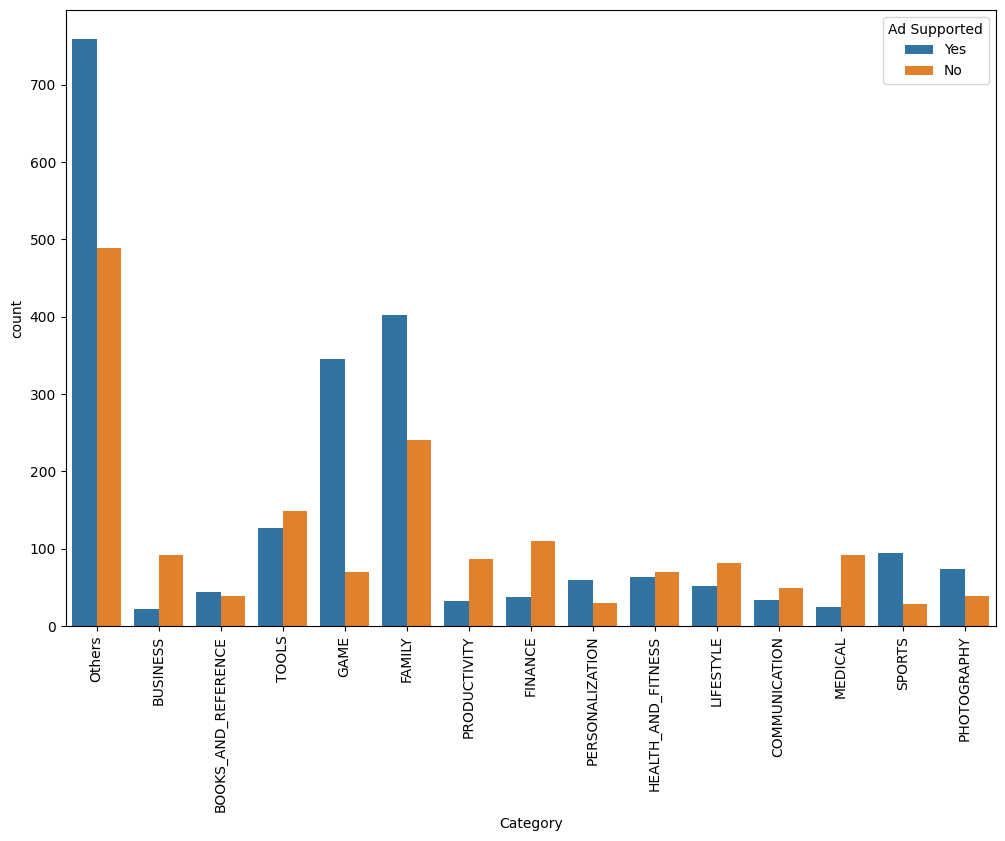

In [114]:
plt.figure(figsize=(12,8))
sns.countplot(data= df[df['Paid/Free']=='Free'], x='Category', hue='Ad Supported')
plt.xticks(rotation=90);

#### Category-To-AdSupported with Paid Insight

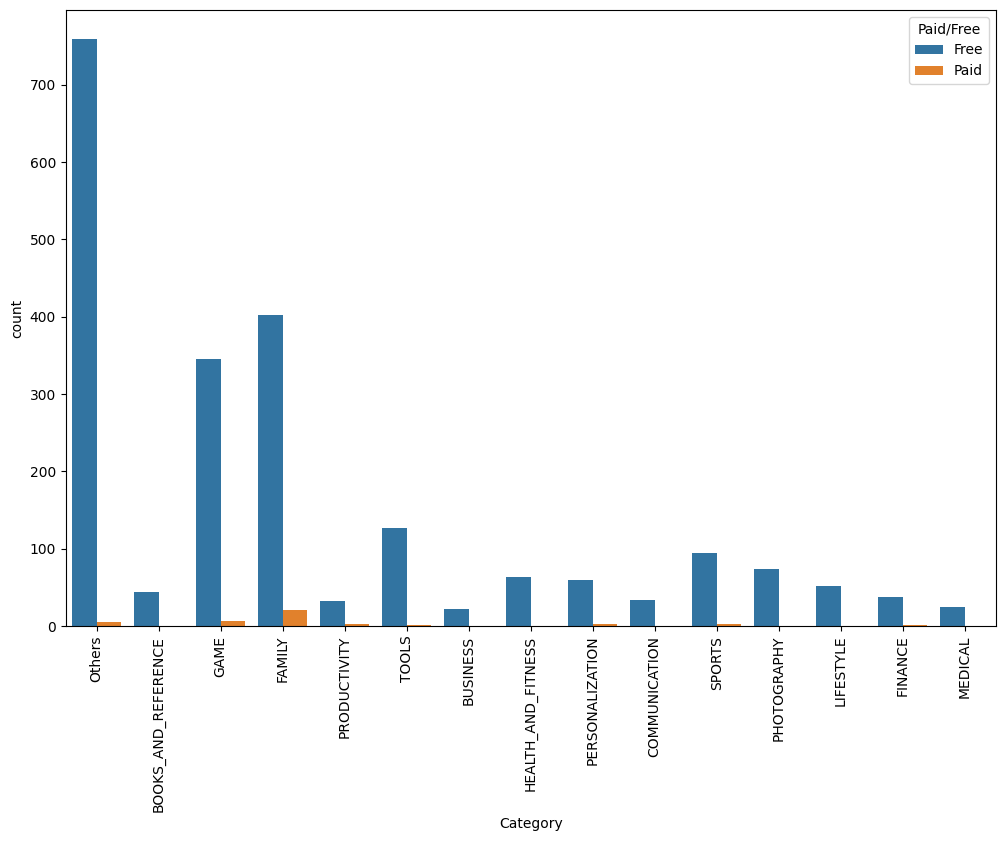

In [115]:
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['Ad Supported']=='Yes'], x='Category', hue='Paid/Free')
plt.xticks(rotation=90);

- *Apps which have Ad support feature are mostly free to use in all the categories*

It is observed that Reviews and Installation followed almost similar trends, therefore they may have some relationship with each other.

Let's check if there is any relationship between these 2 variables and also with any other variable

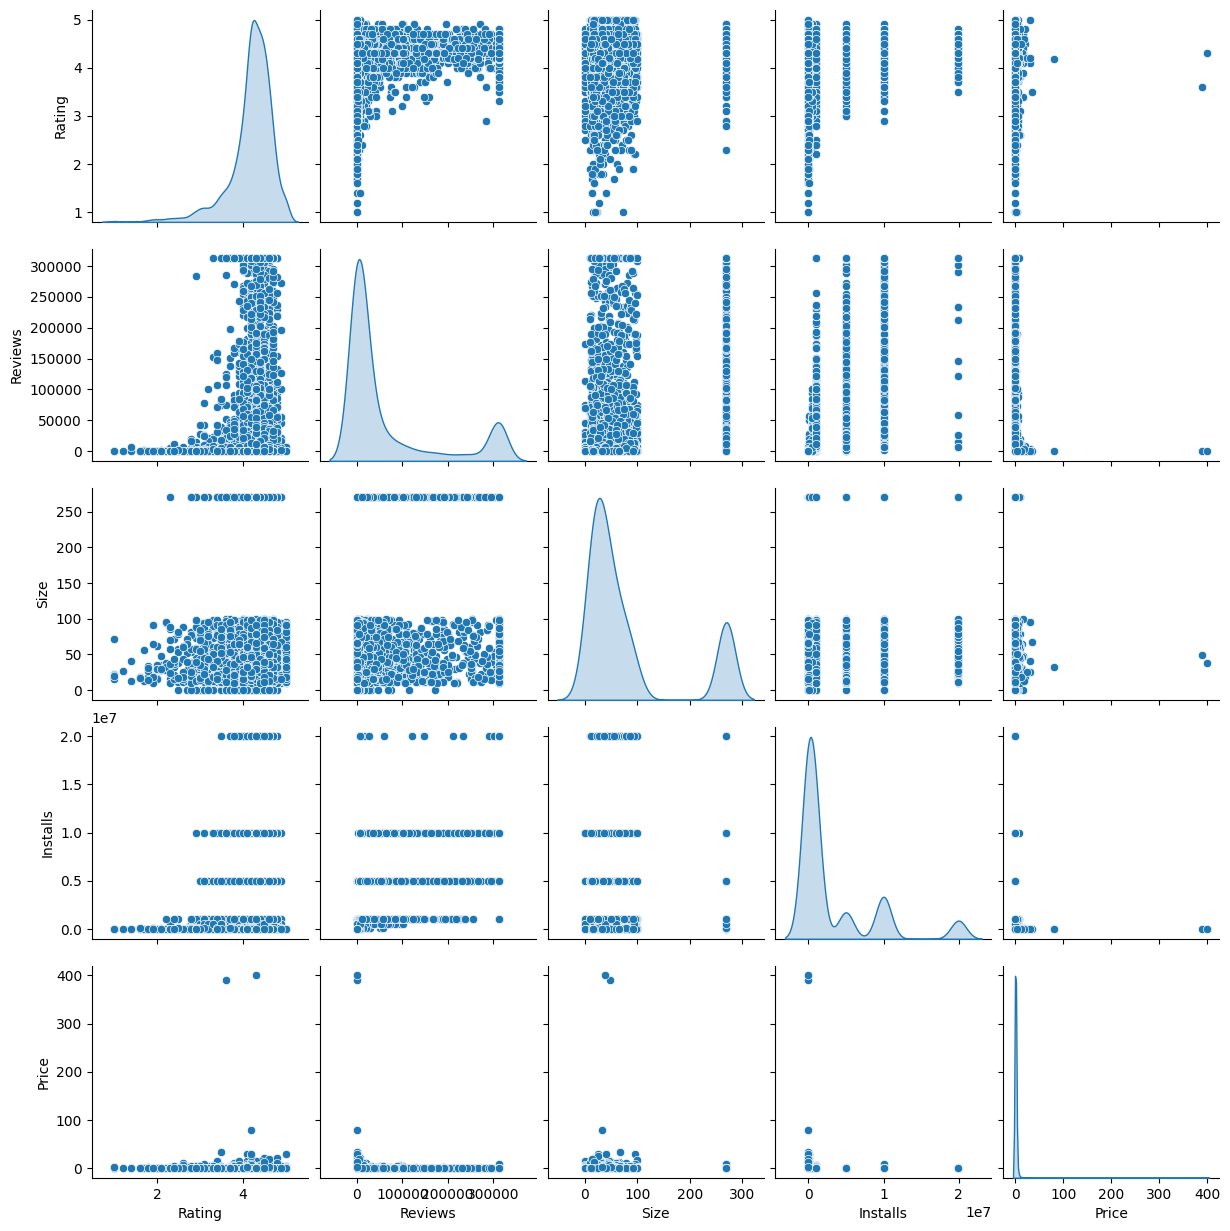

In [122]:
sns.pairplot(data=df, diag_kind="kde")
plt.show();

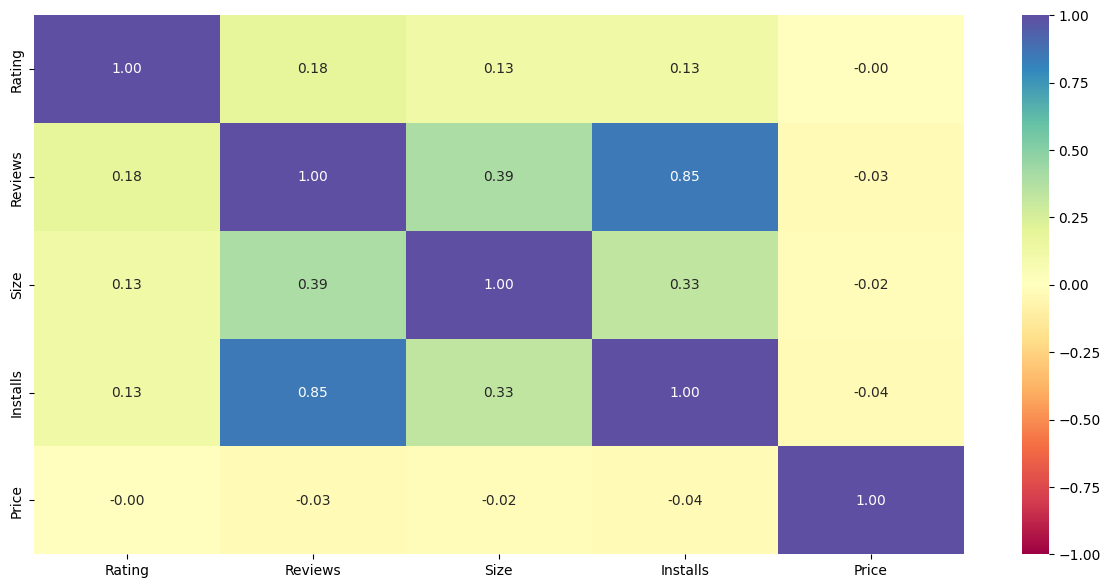

In [130]:
onlyNumericalValues = df[['Rating','Reviews','Size','Installs','Price']]
corr = onlyNumericalValues.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *As expected, Installs and Reviews have a strong correlation with each other*
- *There is no such relationship between any of the other variables*

#### Outlier Visualization

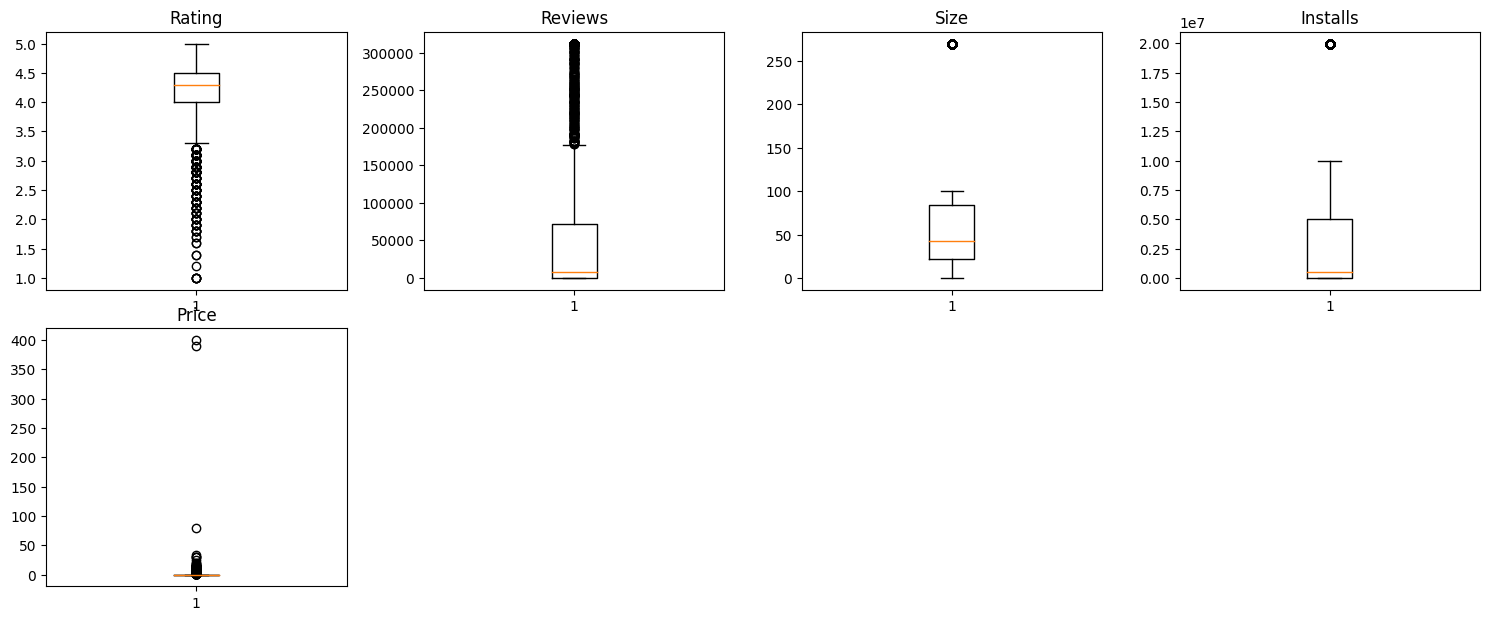

In [132]:
# outlier visualization using boxplot
numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs','Price']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Recommendations

1. An ad agency could focus on apps in the **Family** category for Advertisement. Those apps are significantly trending in the market.
2. Free apps are significantly more popular than paid apps, so placing ads in free apps seems like a good choice.
    - **Finance** and **Medical** apps, though, do not support ads. More research might reveal alternative ways of getting ads out for those types of apps.
3. **Get More Data**:
  - Any current ad revenue
  - time spent in the app
  - ages of users